In [2155]:
%pip install scipy
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [2156]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2157]:
#Carga desde un archivo .csv sin indice
df = pd.read_csv('Base_Mexico_LIMPIA.csv')
df.head(5)

,Unnamed: 0,id,scrape_id,host_id,latitude,longitude,listing_url,last_scraped,source,name,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month
0,0,898633,20240627045222,4796027,19.42063,-99.16586,https://www.airbnb.com/rooms/898633,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,...,4.95,4.93,4.95,4.93,4.96,4.93,4.91,2.0,1.0,0.41
1,1,35797,20240627045222,153786,19.38283,-99.27178,https://www.airbnb.com/rooms/35797,2024-06-27,city scrape,Villa Dante,...,4.80,4.90,4.80,4.90,4.90,4.90,4.80,1.0,0.0,1.50
2,2,44616,20240627045222,196253,19.41162,-99.17794,https://www.airbnb.com/rooms/44616,2024-06-28,city scrape,CONDESA HAUS B&B,...,4.58,4.56,4.70,4.87,4.78,4.98,4.48,4.0,2.0,0.42
3,3,913084,20240627045222,4647293,19.43956,-99.17263,https://www.airbnb.com/rooms/913084,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,...,4.75,4.83,4.72,4.84,4.93,4.90,4.75,1.0,0.0,1.19
4,4,67703,20240627045222,334451,19.41152,-99.16857,https://www.airbnb.com/rooms/67703,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",...,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.0,0.32


In [2158]:
#Sustituir valores nulos por un string en  concreto 
df["host_response_rate"] =df["host_response_rate"].replace('No captured',0) 
# Elimina cualquier símbolo no numérico (por ejemplo, '%') y convierte a tipo float
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

#Sustituir valores nulos por un string en  concreto 
df["host_acceptance_rate"] =df["host_acceptance_rate"].replace('No captured',0) 
# Elimina cualquier símbolo no numérico (por ejemplo, '%') y convierte a tipo float
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)


In [2159]:
#Realizamos una copia del dataframe
data=df.copy()

#Sustituir valores nulos con promedio o media
df["host_response_rate"]=df["host_response_rate"].fillna(round(data["host_response_rate"].mean(),1))
df["host_acceptance_rate"]=df["host_acceptance_rate"].fillna(round(data["host_acceptance_rate"].mean(),1))

In [2160]:
#ajustar max de filas
pd.options.display.max_rows=10
cuantitativas=data.iloc[ : , 40:71]
cuantitativas

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms
0,3.0,6.0,2.0,1.0,1.0,2.0,1652.0,3.0,48,3.0,...,0.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,2.0,1.0
1,1.0,1.0,2.0,1.0,1.0,1.0,1057.7,1.0,7,1.0,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.80,1.0,0.0
2,17.0,17.0,2.9,1.4,1.4,1.5,1057.7,1.0,365,1.0,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,4.0,2.0
3,1.0,4.0,4.0,1.0,2.0,3.0,814.0,2.0,1125,2.0,...,0.0,4.75,4.83,4.72,4.84,4.93,4.90,4.75,1.0,0.0
4,3.0,4.0,4.0,1.0,2.0,2.0,1923.0,2.0,30,2.0,...,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,13.0,15.0,2.9,1.4,1.4,1.5,1057.7,2.0,365,2.0,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.80,8.0,0.0
26532,33.0,7.1,3.0,1.0,1.0,2.0,1478.0,1.0,365,1.0,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.80,11.0,0.0
26533,12.0,15.0,3.0,1.0,1.0,1.0,936.0,2.0,365,2.0,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.80,1.0,0.0
26534,3.0,3.0,4.0,1.5,1.0,2.0,768.0,1.0,365,1.0,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.80,3.0,0.0


In [2161]:
variables=data.iloc[ : , [19,20,41,42,71,46]]
variables

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
0,100.0,88.0,6.0,2.0,0.41,1652.0
1,0.0,NaN,1.0,2.0,1.50,1057.7
2,100.0,92.0,17.0,2.9,0.42,1057.7
3,100.0,96.0,4.0,4.0,1.19,814.0
4,89.0,62.0,4.0,4.0,0.32,1923.0
...,...,...,...,...,...,...
26531,100.0,100.0,15.0,2.9,1.50,1057.7
26532,97.0,91.0,7.1,3.0,1.50,1478.0
26533,100.0,100.0,15.0,3.0,1.50,936.0
26534,100.0,100.0,3.0,4.0,1.50,768.0


c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

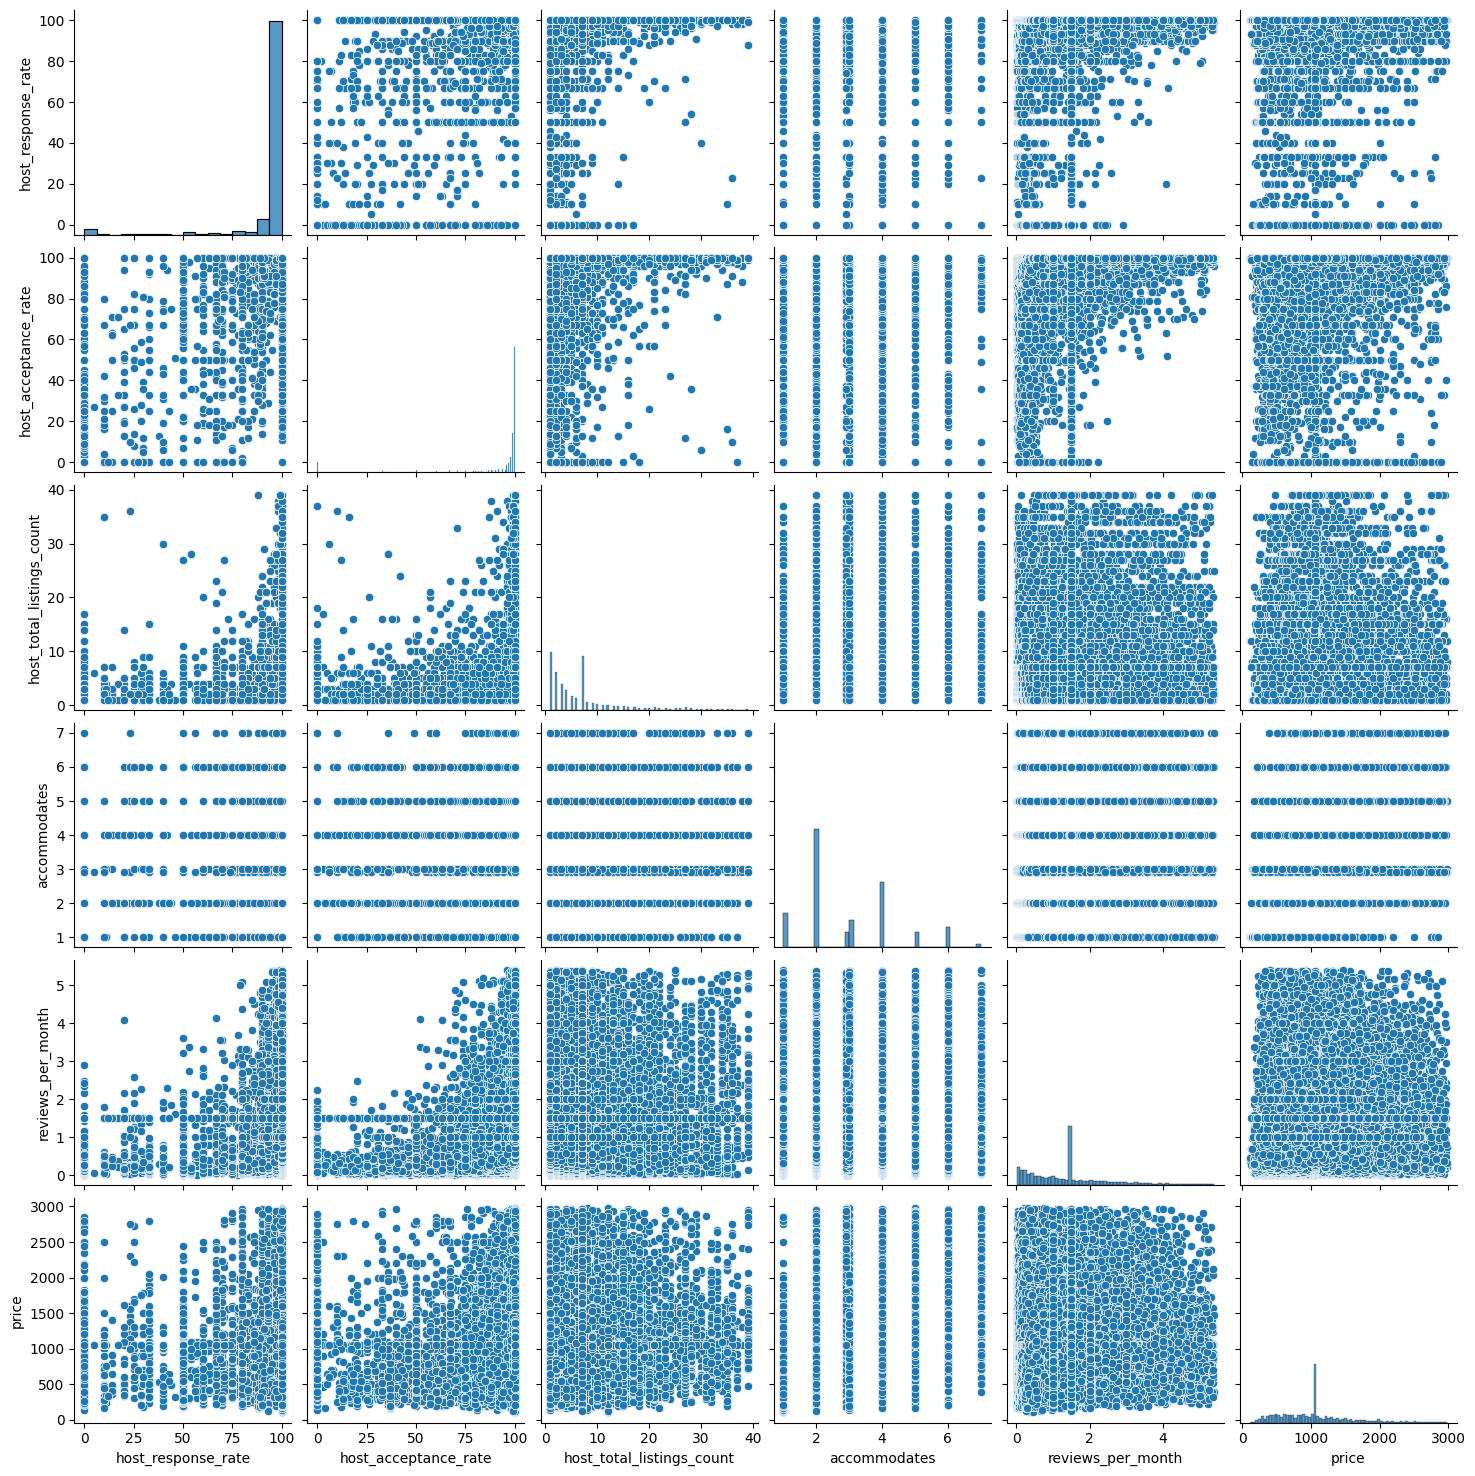

In [2162]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(variables)

1. VARIABLE price

In [2163]:
#Realizamos una copia del dataframe
data=df.copy()

#Sustituir valores nulos con promedio o media
df["host_response_rate"]=df["host_response_rate"].fillna(round(data["host_response_rate"].mean(),1))
df["host_acceptance_rate"]=df["host_acceptance_rate"].fillna(round(data["host_acceptance_rate"].mean(),1))

In [2164]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= data[['host_response_rate']]
Var_Dep= data['price']

In [2165]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo 1:Función cuadrática***

In [2166]:
def  func1 (x, a, b, c):
     return (a*x**2 + b*x + c)

#ajustar max de filas
pd.options.display.max_rows=10

In [2167]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_response_rate'], data['price'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.34653125e-02, 6.60648195e-01, 8.71733337e+02])

In [2168]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_response_rate'], data['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

In [2169]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,host_response_rate
0,1072.451281
1,871.733337
2,1072.451281
3,1072.451281
4,1037.189766
...,...
26531,1072.451281
26532,1062.511337
26533,1072.451281
26534,1072.451281


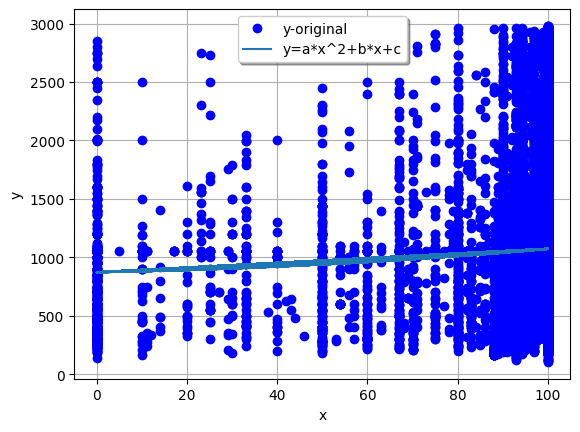

In [2170]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2171]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

C:\Users\sarah\AppData\Roaming\Python\Python312\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.0045984790435319445

In [2172]:
r=np.sqrt(R2)
r

0.06781208626441118

***Modelo 2: Funsión Inversa***

In [2173]:
def  func1 (x, a, b, c):
     return 1/a*x
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_response_rate'], data['price'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\3149385303.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_response_rate'], data['price'])


array([0.09148273, 1.        , 1.        ])

In [2174]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_response_rate'], data['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1


C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1801824763.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_response_rate'], data['price'])


,host_response_rate
0,1015.827266
1,1.000000
2,1015.827266
3,1015.827266
4,814.634678
...,...
26531,1015.827266
26532,958.760975
26533,1015.827266
26534,1015.827266


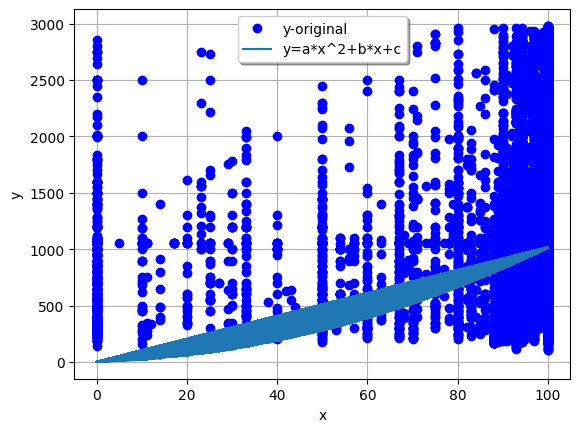

In [2175]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2176]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.1271977119634291

In [2177]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

2. VARIABLE host_acceptance_rate

In [2178]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['host_acceptance_rate']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función cuadrática inversa***

In [2179]:
def  func1 (x, a, b, c):
     return 1/a*x**15

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\465106096.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])


array([4.41633899e+08, 1.00000000e+00, 1.00000000e+00])

In [2180]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\2177229522.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])


,reviews_per_month
0,7.423866e+07
1,9.936763e+08
2,7.790422e+07
3,6.253978e+08
4,4.522331e+07
...,...
26531,9.936763e+08
26532,9.936763e+08
26533,9.936763e+08
26534,9.936763e+08


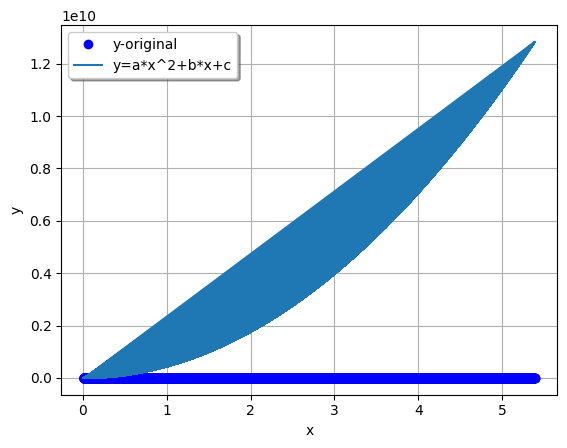

In [2181]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2182]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-1.5827917369485024e+16

In [2183]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo2: Función polinomial inversa***

In [2184]:
def  func1 (x, a, b, c):
     return a/b*x**7 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-4.67495497e-02,  2.31723658e+01,  4.69156566e+01])

In [2185]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,reviews_per_month
0,56.408468
1,81.569019
2,56.639804
3,74.424570
4,54.326027
...,...
26531,81.569019
26532,81.569019
26533,81.569019
26534,81.569019


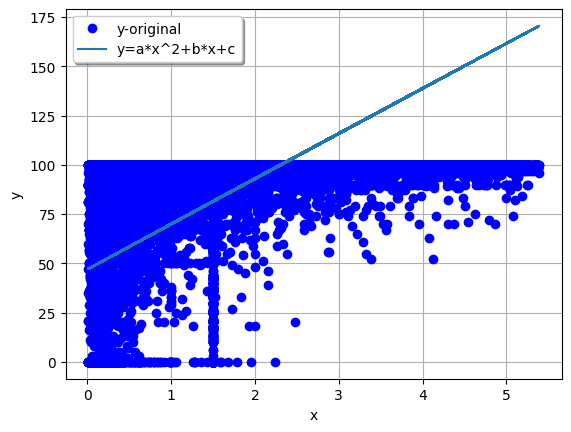

In [2186]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2187]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-1.0834463736184485

In [2188]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

3. VARIABLE host_total_listings_count

In [2189]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['host_total_listings_count']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función polinomial inversa***

In [2190]:
def  func1 (x, ax, bx, a,b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\2563472032.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])


array([1.00000000e+00, 1.00000000e+00, 7.60101721e-04, 7.66352502e+00,
       6.79583597e-02])

In [2191]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1145385212.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])


,host_acceptance_rate
0,7832.00076
1,8153.84076
2,8556.00076
3,9312.00076
4,3906.00076
...,...
26531,10100.00076
26532,8372.00076
26533,10100.00076
26534,10100.00076


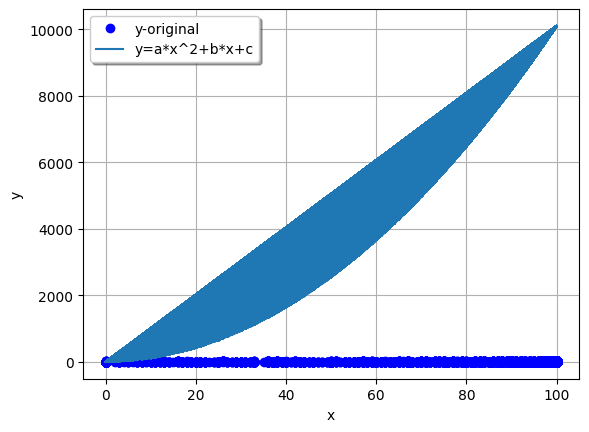

In [2192]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2193]:
#Coeficiente de determinación del modelo

R2 = r2_score(yfit1,y) 
R2

-11.181772728311127

In [2194]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo 2: Funsión cuadrática inversa***

In [2195]:
def  func1 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\3694048404.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])


array([1.24797142e+03, 1.00000000e+00, 1.00000000e+00])

In [2196]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1145385212.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])


,host_acceptance_rate
0,9.664380e+06
1,1.006378e+07
2,1.056292e+07
3,1.150140e+07
4,4.797265e+06
...,...
26531,1.247982e+07
26532,1.033454e+07
26533,1.247982e+07
26534,1.247982e+07


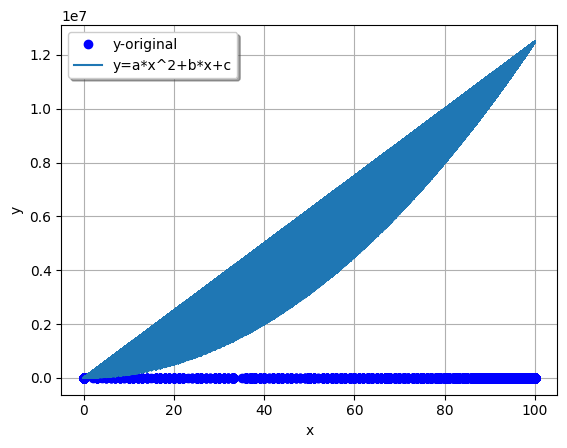

In [2197]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2198]:
#Coeficiente de determinación del modelo

R2 = r2_score(yfit1, y) 
R2

-11.153104020145875

In [2199]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

4. VARIABLE accommodates 

In [2200]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['accommodates']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo 1: Función cociente entre polinomios***

In [2201]:
def  func1 (x, a, b, c):
     return (a*x**114 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\3891043398.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])


array([-1.67804419e-57,  2.95463047e+00,  6.88186760e+16])

In [2202]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\4264709275.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])


,host_acceptance_rate
0,6.881868e+16
1,6.881868e+16
2,6.881868e+16
3,6.881868e+16
4,6.881868e+16
...,...
26531,6.881868e+16
26532,6.881868e+16
26533,6.881868e+16
26534,6.881868e+16


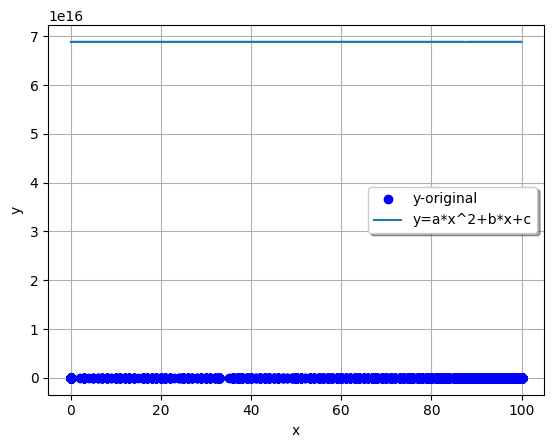

In [2203]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2204]:
#Coeficiente de determinación del modelo

R2 = r2_score(yfit1,y) 
R2

-1.0404835652062834e+30

In [2205]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo 2: Función Valor absoluto***

In [2206]:
def  func1 (x, a, b, c):
     return a*np.sin(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\77876690.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])


array([-0.17521741,  2.90096517,  1.        ])

In [2207]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\4264709275.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])


,host_acceptance_rate
0,-1100.598653
1,-1151.453494
2,-1215.151324
3,-1335.310953
4,-492.675866
...,...
26531,-1461.077538
26532,-1185.987504
26533,-1461.077538
26534,-1461.077538


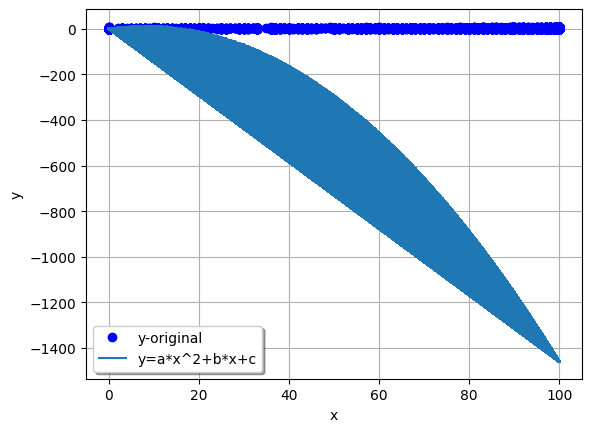

In [2208]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2209]:
#Coeficiente de determinación del modelo

R2 = r2_score(yfit1,y) 
R2

-10.26082491788834

In [2210]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

5. VARIABLE reviews_per_month

In [2211]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_total_listings_count']]
Var_Dep= df['reviews_per_month']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función cociente entre polinomios***

In [2212]:
def  func1 (x, a, b, c):
     return (a*x**1.5 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-1.63036188e-03,  3.72899251e-01,  1.79656139e+00])

In [2213]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,host_total_listings_count
0,3.975264
1,2.167830
2,7.664674
3,3.262073
4,3.262073
...,...
26531,7.023219
26532,4.361960
26533,7.023219
26534,2.900586


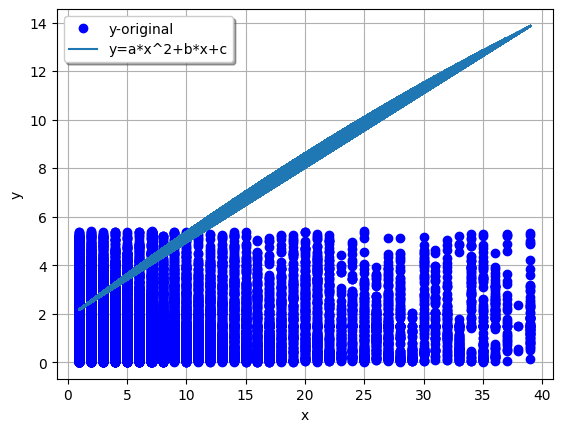

In [2214]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2215]:
#Coeficiente de determinación del modelo

R2 = r2_score(yfit1,y) 
R2

-1.5060039360060484

In [2216]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo2: Función Valor absoluto***

In [2217]:
def  func1 (x, a, b, c):
     return (a*x**2 + b*x + c)

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-6.78097115e-04,  3.21080355e-02,  1.30987930e+00])

In [2218]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,host_total_listings_count
0,1.478116
1,1.341309
2,1.659746
3,1.427462
4,1.427462
...,...
26531,1.638928
26532,1.503663
26533,1.638928
26534,1.400101


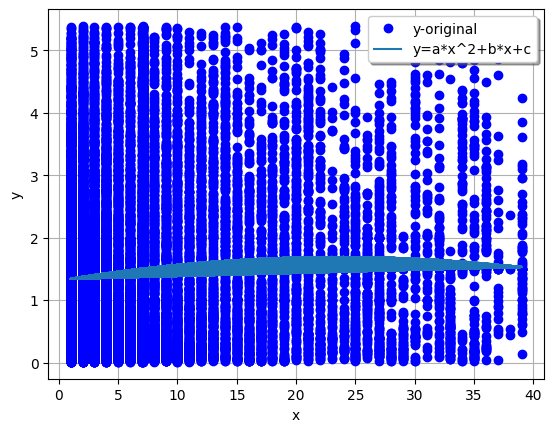

In [2219]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2220]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.008433732397815308

In [2221]:
r=np.sqrt(R2)
r

0.09183535483578918

6. VARIABLE host_response_rate

In [2222]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_total_listings_count']]
Var_Dep= df['host_response_rate']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función exponencial***

In [2223]:
def  func1 (x, a, b, c):
     return a * np.exp(b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([4.71700059e-17, 1.00000073e+00, 9.43015333e+01])

In [2224]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,host_total_listings_count
0,100.301538
1,95.301534
2,111.301546
3,98.301536
4,98.301536
...,...
26531,109.301544
26532,101.401538
26533,109.301544
26534,97.301535


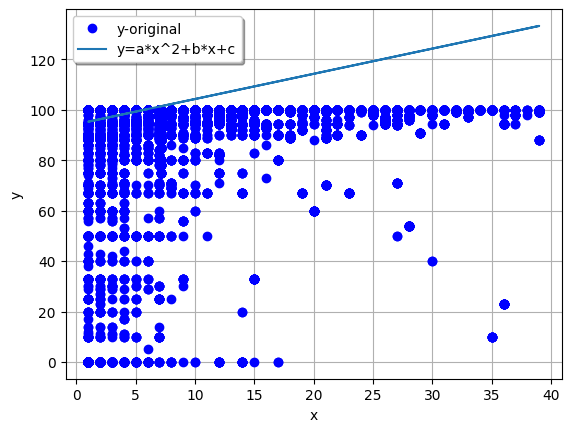

In [2225]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2226]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.2790721328692918

In [2227]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo2: Función exponencial***

In [2228]:
def  func1 (x, a, b, c,ax,bx):
     return a * np.exp(b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1475558438.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])


array([4.71700437e-17, 1.00000072e+00, 9.43015333e+01, 1.00000000e+00,
       1.00000000e+00])

In [2229]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1104041122.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])


,host_total_listings_count
0,100.301538
1,95.301534
2,111.301545
3,98.301536
4,98.301536
...,...
26531,109.301544
26532,101.401538
26533,109.301544
26534,97.301535


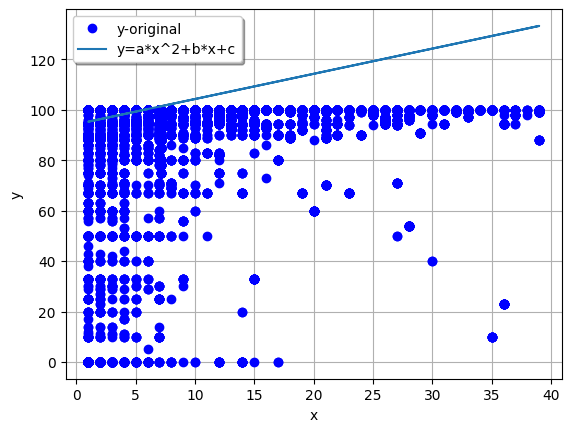

In [2230]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [2231]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-0.27907212615454924

In [2232]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_11572\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan